#<font color=”blue”> AIGC 5005 Midterm Project - Online Purchase Order Risk Classification 


<b> Steps </b>
1.   Import Libraries
2.   Explore and Clean Dataset
     *   Identify Null Values
     *   Delete Columns having more than 50% null data.
     *   Impute data for columns where less than 50% data is missing.
     *   Reduce the null values to 0.
     *   Convert text labels to numerical labels.
3.   Build your data model
     *   Scale the Datapoints
     *   Split the data into X,y
     *   Split the data into Train & Test
     *   Implement different models - SVM, RandomForestClassifier, LogisticRegression.
     *   Evaluate different metrics.
4.   Apply the best model to the test dataset and save the result as a .csv file.
</font>


     







##<b> 1. Import Libraries </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##<b> 2. Explore and Clean Dataset </b>

In [ ]:
df_train = pd.read_csv("https://raw.githubusercontent.com/Sofiaanjum/AIGC5005_MidtermProject/main/risk-test.txt", delimiter="\t", index_col="ORDER_ID")
df_train.head()

,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,TIME_ORDER,AMOUNT_ORDER,ANUMMER_01,ANUMMER_02,ANUMMER_03,ANUMMER_04,ANUMMER_05,ANUMMER_06,ANUMMER_07,ANUMMER_08,ANUMMER_09,ANUMMER_10,CHK_LADR,CHK_RADR,CHK_KTO,CHK_CARD,CHK_COOKIE,CHK_IP,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
ORDER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49916,yes,no,7/22/1979,no,no,credit_card,Visa,2.2005,yes,64.5,Saturday,6:42,1,608801,?,?,?,?,?,?,?,?,?,no,no,no,no,no,no,no,no,no,no,no,no,6,yes,0,0.00,?,?,?
49918,no,no,2/5/1973,no,no,credit_card,Eurocard,4.2005,yes,74.3,Saturday,14:44,4,400124,103776,206310,207317,?,?,?,?,?,?,no,no,no,no,no,no,no,no,no,no,no,no,9,no,1,30.31,9/2/2004,0,0
49920,yes,no,7/19/1970,yes,no,check,?,8.2005,?,42.8,Sunday,18:40,1,406284,?,?,?,?,?,?,?,?,?,no,no,no,no,no,no,no,no,no,yes,no,no,5,yes,0,0.00,?,?,?
49921,yes,no,4/9/1985,yes,no,credit_card,Eurocard,7.2006,yes,42.8,Saturday,14:22,1,403772,?,?,?,?,?,?,?,?,?,no,no,no,no,no,no,no,no,no,no,no,no,13,no,1,54.07,12/24/2003,0,1
49922,no,yes,4/7/1963,no,no,debit_note,?,5.2007,yes,6.5,Wednesday,1:54,1,202410,?,?,?,?,?,?,?,?,?,no,no,no,no,no,no,no,no,no,yes,no,no,8,yes,0,0.00,?,?,?


In [ ]:
df_train.shape

(30000, 43)

In [ ]:
df_train = df_train.replace(to_replace="?", value=np.nan)

In [ ]:
df_train.head()

,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
ORDER_ID,,,,,,,,,,,,,,,,,,,,,
49917,no,yes,no,1/17/1973,yes,yes,check,NaN,5.2006,NaN,...,no,no,no,8,yes,0,0.00,NaN,NaN,NaN
49919,no,yes,yes,12/8/1970,no,no,credit_card,Visa,12.2007,yes,...,yes,no,no,13,yes,0,0.00,NaN,NaN,NaN
49923,no,yes,no,4/3/1972,yes,no,check,NaN,12.2007,NaN,...,no,no,no,3,yes,0,0.00,NaN,NaN,NaN
49924,no,no,yes,8/1/1966,yes,no,check,NaN,1.2007,NaN,...,no,no,no,11,no,4,75.72,5/12/2002,0,0
49927,no,yes,yes,12/21/1969,yes,no,credit_card,Eurocard,12.2006,yes,...,no,no,no,16,yes,0,0.00,NaN,NaN,NaN


In [ ]:
df_train.isnull().sum()

CLASS                    0
B_EMAIL                  0
B_TELEFON                0
B_BIRTHDATE           2942
FLAG_LRIDENTISCH         0
FLAG_NEWSLETTER          0
Z_METHODE                0
Z_CARD_ART           18654
Z_CARD_VALID             0
Z_LAST_NAME          14808
VALUE_ORDER              0
WEEKDAY_ORDER            0
TIME_ORDER              20
AMOUNT_ORDER             0
ANUMMER_01               0
ANUMMER_02           22147
ANUMMER_03           26802
ANUMMER_04           28668
ANUMMER_05           29459
ANUMMER_06           29794
ANUMMER_07           29905
ANUMMER_08           29966
ANUMMER_09           29993
ANUMMER_10           30000
CHK_LADR                 0
CHK_RADR                 0
CHK_KTO                  0
CHK_CARD                 0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_LORT                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZ                0
FAIL_RORT                0
FAIL_RPLZORTMATCH        0
SESSION_TIME             0
N

Dropping the attributes which have more than 20K null values, as substituting the values for such records will lead to training bias.

In [ ]:
df_train.drop(columns=['ANUMMER_01', 'ANUMMER_02','ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05', 'ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09', 'ANUMMER_10'], inplace=True)

In [ ]:
df_train.isnull().sum()

CLASS                    0
B_EMAIL                  0
B_TELEFON                0
B_BIRTHDATE           2942
FLAG_LRIDENTISCH         0
FLAG_NEWSLETTER          0
Z_METHODE                0
Z_CARD_ART           18654
Z_CARD_VALID             0
Z_LAST_NAME          14808
VALUE_ORDER              0
WEEKDAY_ORDER            0
TIME_ORDER              20
AMOUNT_ORDER             0
CHK_LADR                 0
CHK_RADR                 0
CHK_KTO                  0
CHK_CARD                 0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_LORT                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZ                0
FAIL_RORT                0
FAIL_RPLZORTMATCH        0
SESSION_TIME             0
NEUKUNDE                 0
AMOUNT_ORDER_PRE         0
VALUE_ORDER_PRE          0
DATE_LORDER          15856
MAHN_AKT             15856
MAHN_HOECHST         15856
dtype: int64

<b> Checking other null value records and imputing them with appropriate values where possible.

<b> Column 'Z_CARD_ART'

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_train['Z_CARD_ART'].value_counts()

Eurocard      5096
Visa          3927
debit_card    1550
Amex           773
Name: Z_CARD_ART, dtype: int64

<b> Since the Z_CARD_ART value has card company names, it would be better to impute the missing values with 'unknown' as we do not want to misclassify a customer with incorrect card names.

In [ ]:
df_train['Z_CARD_ART'] = df_train['Z_CARD_ART'].replace(to_replace=np.nan, value='unknown')

In [ ]:
df_train['Z_CARD_ART'].value_counts()

unknown       18654
Eurocard       5096
Visa           3927
debit_card     1550
Amex            773
Name: Z_CARD_ART, dtype: int64

<b> Column 'DATE_LORDER' </b>

In [ ]:
df_train['DATE_LORDER'] = pd.to_datetime(df_train['DATE_LORDER'], format="%m/%d/%Y")

In [ ]:
df_train['DATE_LORDER'].mean()

Timestamp('2002-12-30 08:01:03.122172032')

In [ ]:
df_train['DATE_LORDER'].median()

Timestamp('2003-01-04 00:00:00')

In [ ]:
df_train['DATE_LORDER'].mode()

0   2001-03-19
dtype: datetime64[ns]

In [ ]:
df_train['DATE_LORDER'].max()

Timestamp('2005-01-19 00:00:00')

In [ ]:
df_train['DATE_LORDER'].min()

Timestamp('2000-12-12 00:00:00')

The 'DATE_LORDER' Column has the information about the customer's last order. The min date of the last order in the dataset is 12th Dec 2000 and the max date of the day of the last order in the dataset is 19th Jan 2005. Hence we can create a new feature using that information which might help us to make better decisions. However there are 14808 missing values in the data which account for almost 50% of the dataset. We will have to impute missing values for such rows which will add bias to our model. Hence it would be better to drop the column.

In [ ]:
df_train.drop(columns=['DATE_LORDER'], inplace=True)

<b>Column Z_CARD_VALID - Expiration date of the card in the form month.year(e.g. 05.2006 meaning the card is valide till May 2006) </b>

In [ ]:
# Split the 'Name' column on the space delimiter
df_train[['V_MONTH', 'V_YEAR']] = df_train['Z_CARD_VALID'].astype(str).str.split('.', expand=True)

# Drop the original 'Name' column
df_train = df_train.drop('Z_CARD_VALID', axis=1)

df_train['V_MONTH'] = df_train['V_MONTH'].astype(int)
df_train['V_YEAR'] = df_train['V_YEAR'].astype(int)

In [ ]:
df_train.columns

Index(['CLASS', 'B_EMAIL', 'B_TELEFON', 'B_BIRTHDATE', 'FLAG_LRIDENTISCH',
       'FLAG_NEWSLETTER', 'Z_METHODE', 'Z_CARD_ART', 'Z_LAST_NAME',
       'VALUE_ORDER', 'WEEKDAY_ORDER', 'TIME_ORDER', 'AMOUNT_ORDER',
       'CHK_LADR', 'CHK_RADR', 'CHK_KTO', 'CHK_CARD', 'CHK_COOKIE', 'CHK_IP',
       'FAIL_LPLZ', 'FAIL_LORT', 'FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT',
       'FAIL_RPLZORTMATCH', 'SESSION_TIME', 'NEUKUNDE', 'AMOUNT_ORDER_PRE',
       'VALUE_ORDER_PRE', 'MAHN_AKT', 'MAHN_HOECHST', 'V_MONTH', 'V_YEAR'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 49917 to 49829
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLASS              30000 non-null  object 
 1   B_EMAIL            30000 non-null  object 
 2   B_TELEFON          30000 non-null  object 
 3   B_BIRTHDATE        27058 non-null  object 
 4   FLAG_LRIDENTISCH   30000 non-null  object 
 5   FLAG_NEWSLETTER    30000 non-null  object 
 6   Z_METHODE          30000 non-null  object 
 7   Z_CARD_ART         30000 non-null  object 
 8   Z_LAST_NAME        15192 non-null  object 
 9   VALUE_ORDER        30000 non-null  float64
 10  WEEKDAY_ORDER      30000 non-null  object 
 11  TIME_ORDER         29980 non-null  object 
 12  AMOUNT_ORDER       30000 non-null  int64  
 13  CHK_LADR           30000 non-null  object 
 14  CHK_RADR           30000 non-null  object 
 15  CHK_KTO            30000 non-null  object 
 16  CHK_CARD          

<b> Column MAHN_AKT - Current stage of reminder of the customer, if available </b>

In [ ]:
df_train['MAHN_AKT'].value_counts()

0    12703
1     1182
3      133
2      126
Name: MAHN_AKT, dtype: int64

It appears from the values that these numbers(0,1,2,3) are some form of a code for the current stage of reminders where available. Here we can assume that the nulls would be reminder stages which are not available. Hence we can impute the nulls with 9-'not available/unknown'.

In [ ]:
df_train['MAHN_AKT'] = df_train['MAHN_AKT'].replace(np.nan, value=9) 

In [ ]:
df_train['MAHN_AKT'].value_counts()

9    15856
0    12703
1     1182
3      133
2      126
Name: MAHN_AKT, dtype: int64

<b> Column MAHN_HOECHST - Highest stage of reminder of the customer occurred up to now, if available

In [ ]:
df_train['MAHN_HOECHST'].value_counts()

0    10200
1     2282
2     1253
3      409
Name: MAHN_HOECHST, dtype: int64

Similar to MAHN_AKT, even for MAHN_HOECHST, it appears from the values that these numbers(0,1,2,3) are some form of a code for the current stage of reminders where available. Here we can assume that the nulls would be reminder stages which are not available. Hence we can impute the nulls with 9-'not available/unknown'.

In [ ]:
df_train['MAHN_HOECHST'] = df_train['MAHN_HOECHST'].replace(np.nan, value=9)

In [ ]:
df_train['MAHN_HOECHST'].value_counts()

9    15856
0    10200
1     2282
2     1253
3      409
Name: MAHN_HOECHST, dtype: int64

<b> Z_LAST_NAME - is the name of the account or card holder identical with the name of the delivery address (yes/no) </b>

In [ ]:
df_train['Z_LAST_NAME'].value_counts()

yes    14437
no       755
Name: Z_LAST_NAME, dtype: int64

The values for Z_LAST_NAME column are yes and no. The column looks important for the classification. It would be a good idea to use 'unknown' for missing values. If the results become biased we can go ahead and drop the column.

In [ ]:
df_train['Z_LAST_NAME'] = df_train['Z_LAST_NAME'].replace(np.nan, value='unknown')

<b> B_BIRTHDATE - Birth date, if submitted together with the order </b>

In [ ]:
df_train['B_BIRTHDATE'].value_counts()

6/1/1969      11
10/18/1973    11
8/22/1974     10
6/18/1974     10
7/5/1977      10
8/3/1977      10
8/11/1970     10
1/4/1977       9
8/24/1970      9
12/1/1977      9
10/11/1964     9
4/3/1965       9
5/5/1973       9
5/9/1985       9
8/13/1970      9
1/2/1975       9
1/19/1963      9
5/7/1975       9
10/13/1981     8
10/12/1972     8
2/25/1970      8
12/24/1967     8
1/17/1978      8
9/16/1973      8
9/30/1972      8
11/22/1968     8
9/16/1974      8
3/10/1977      8
8/16/1973      8
11/6/1971      8
4/11/1972      8
5/18/1972      8
6/15/1970      8
4/24/1975      8
11/17/1978     8
3/19/1970      8
6/8/1975       8
7/8/1968       8
9/27/1968      8
6/27/1973      8
10/2/1978      8
10/24/1971     8
5/28/1965      8
12/25/1983     8
5/27/1966      8
3/18/1976      8
5/21/1978      8
3/22/1984      8
5/7/1971       8
5/30/1975      8
8/12/1972      7
5/19/1976      7
10/24/1977     7
7/23/1979      7
10/15/1970     7
10/2/1983      7
1/10/1970      7
6/11/1963      7
5/8/1977      

The Birthdate field is optional and mostly has unique values. We can take into consideration the year a person was born and impute the values using that, but there are too many values to consider for imputing. So it would be a good idea to drop the column instead.

In [ ]:
df_train.drop(columns=['B_BIRTHDATE'], inplace=True)

<b> TIME_ORDER - Time of the order </b>

In [ ]:
df_train['TIME_ORDER'].isnull().sum()

20

There are only 20 missing values and the TIME_ORDER can give some important information about people getting rejected for a order. We will go ahead and drop the null records and work with what we have. Since the count is very less, it wont affect the model too much.

In [ ]:
df_cleaned_train = df_train.dropna()

<b> Checking null value count for the new dataframe </b>

In [ ]:
df_cleaned_train.isnull().sum()

CLASS                0
B_EMAIL              0
B_TELEFON            0
FLAG_LRIDENTISCH     0
FLAG_NEWSLETTER      0
Z_METHODE            0
Z_CARD_ART           0
Z_LAST_NAME          0
VALUE_ORDER          0
WEEKDAY_ORDER        0
TIME_ORDER           0
AMOUNT_ORDER         0
CHK_LADR             0
CHK_RADR             0
CHK_KTO              0
CHK_CARD             0
CHK_COOKIE           0
CHK_IP               0
FAIL_LPLZ            0
FAIL_LORT            0
FAIL_LPLZORTMATCH    0
FAIL_RPLZ            0
FAIL_RORT            0
FAIL_RPLZORTMATCH    0
SESSION_TIME         0
NEUKUNDE             0
AMOUNT_ORDER_PRE     0
VALUE_ORDER_PRE      0
MAHN_AKT             0
MAHN_HOECHST         0
V_MONTH              0
V_YEAR               0
dtype: int64

In [ ]:
df_cleaned_train.shape

(29980, 32)

In [ ]:
df_cleaned_train.head()

,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,TIME_ORDER,AMOUNT_ORDER,CHK_LADR,CHK_RADR,CHK_KTO,CHK_CARD,CHK_COOKIE,CHK_IP,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,V_MONTH,V_YEAR
ORDER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49917,no,yes,no,yes,yes,check,unknown,unknown,17.80,Saturday,9:13,1,no,no,no,no,no,no,no,no,no,no,no,no,8,yes,0,0.00,9,9,5,2006
49919,no,yes,yes,no,no,credit_card,Visa,yes,18.20,Wednesday,17:36,1,no,no,no,no,no,no,no,no,no,yes,no,no,13,yes,0,0.00,9,9,12,2007
49923,no,yes,no,yes,no,check,unknown,unknown,10.80,Friday,11:13,1,no,no,no,no,no,no,no,no,no,no,no,no,3,yes,0,0.00,9,9,12,2007
49924,no,no,yes,yes,no,check,unknown,unknown,54.50,Friday,2:07,1,no,no,no,yes,no,no,no,no,no,no,no,no,11,no,4,75.72,0,0,1,2007
49927,no,yes,yes,yes,no,credit_card,Eurocard,yes,19.99,Tuesday,23:46,1,no,no,no,no,no,no,no,no,no,no,no,no,16,yes,0,0.00,9,9,12,2006


<b> ORDER_ID - ID number of the online order </b>

The ORDER_ID column has unique values which help to identify each order. This field will not be of much use in classification, hence dropping it as well.

### Feature Engineering


*   Converting the Time_Order Column into Hours and Minutes



In [ ]:
# Split the 'Name' column on the space delimiter
df_cleaned_train[['ORDER_HOUR', 'ORDER_MINUTE']] = df_cleaned_train['TIME_ORDER'].str.split(':', expand=True)

# Drop the original 'Name' column
df_cleaned_train = df_cleaned_train.drop('TIME_ORDER', axis=1)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_cleaned_train.head()

,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,AMOUNT_ORDER,CHK_LADR,CHK_RADR,CHK_KTO,CHK_CARD,CHK_COOKIE,CHK_IP,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,V_MONTH,V_YEAR,ORDER_HOUR,ORDER_MINUTE
ORDER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49917,no,yes,no,yes,yes,check,unknown,unknown,17.80,Saturday,1,no,no,no,no,no,no,no,no,no,no,no,no,8,yes,0,0.00,9,9,5,2006,9,13
49919,no,yes,yes,no,no,credit_card,Visa,yes,18.20,Wednesday,1,no,no,no,no,no,no,no,no,no,yes,no,no,13,yes,0,0.00,9,9,12,2007,17,36
49923,no,yes,no,yes,no,check,unknown,unknown,10.80,Friday,1,no,no,no,no,no,no,no,no,no,no,no,no,3,yes,0,0.00,9,9,12,2007,11,13
49924,no,no,yes,yes,no,check,unknown,unknown,54.50,Friday,1,no,no,no,yes,no,no,no,no,no,no,no,no,11,no,4,75.72,0,0,1,2007,2,07
49927,no,yes,yes,yes,no,credit_card,Eurocard,yes,19.99,Tuesday,1,no,no,no,no,no,no,no,no,no,no,no,no,16,yes,0,0.00,9,9,12,2006,23,46


### Converting all the text columns to numbers

In [ ]:
df_cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29980 entries, 49917 to 49829
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLASS              29980 non-null  object 
 1   B_EMAIL            29980 non-null  object 
 2   B_TELEFON          29980 non-null  object 
 3   FLAG_LRIDENTISCH   29980 non-null  object 
 4   FLAG_NEWSLETTER    29980 non-null  object 
 5   Z_METHODE          29980 non-null  object 
 6   Z_CARD_ART         29980 non-null  object 
 7   Z_LAST_NAME        29980 non-null  object 
 8   VALUE_ORDER        29980 non-null  float64
 9   WEEKDAY_ORDER      29980 non-null  object 
 10  AMOUNT_ORDER       29980 non-null  int64  
 11  CHK_LADR           29980 non-null  object 
 12  CHK_RADR           29980 non-null  object 
 13  CHK_KTO            29980 non-null  object 
 14  CHK_CARD           29980 non-null  object 
 15  CHK_COOKIE         29980 non-null  object 
 16  CHK_IP            

<b> Since we have a lot of Yes/No Columns, we will use "LABEL ENCODING" for such columns. We can check what technique to use for the other columns once we are done will all such columns. </b>

In [ ]:
def impute_label(df, col_name):
  df[col_name] = df[col_name].map({'yes':1 ,'no':0})

Here, 'yes' means high risk and "no" means low risk of default payment.

<b>CLASS</b> Column

In [ ]:
df_cleaned_train['CLASS'].value_counts()

no     28235
yes     1745
Name: CLASS, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'CLASS')

In [ ]:
df_cleaned_train['CLASS'].value_counts()

0    28235
1     1745
Name: CLASS, dtype: int64

<b>B_EMAIL</b> Column

In [ ]:
df_cleaned_train['B_EMAIL'].value_counts()

yes    23947
no      6033
Name: B_EMAIL, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'B_EMAIL')

In [ ]:
df_cleaned_train['B_EMAIL'].value_counts()

1    23947
0     6033
Name: B_EMAIL, dtype: int64

<b>B_TELEFON</b> Column

In [ ]:
df_cleaned_train['B_TELEFON'].value_counts()

no     25476
yes     4504
Name: B_TELEFON, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'B_TELEFON')

In [ ]:
df_cleaned_train['B_TELEFON'].value_counts()

0    25476
1     4504
Name: B_TELEFON, dtype: int64

<b> FLAG_LRIDENTISCH </b> Column

In [ ]:
df_cleaned_train['FLAG_LRIDENTISCH'].value_counts()

yes    21144
no      8836
Name: FLAG_LRIDENTISCH, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'FLAG_LRIDENTISCH')

In [ ]:
df_cleaned_train['FLAG_LRIDENTISCH'].value_counts()

1    21144
0     8836
Name: FLAG_LRIDENTISCH, dtype: int64

<b>FLAG_NEWSLETTER</b> Column

In [ ]:
df_cleaned_train['FLAG_NEWSLETTER'].value_counts()

no     28752
yes     1228
Name: FLAG_NEWSLETTER, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'FLAG_NEWSLETTER')

In [ ]:
df_cleaned_train['FLAG_NEWSLETTER'].value_counts()

0    28752
1     1228
Name: FLAG_NEWSLETTER, dtype: int64

<b>CHK_LADR</b> Column

In [ ]:
df_cleaned_train['CHK_LADR'].value_counts()

no     28847
yes     1133
Name: CHK_LADR, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'CHK_LADR')

In [ ]:
df_cleaned_train['CHK_LADR'].value_counts()

0    28847
1     1133
Name: CHK_LADR, dtype: int64

<b>CHK_RADR</b> Column

In [ ]:
df_cleaned_train['CHK_RADR'].value_counts()

no     29869
yes      111
Name: CHK_RADR, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'CHK_RADR')

In [ ]:
df_cleaned_train['CHK_RADR'].value_counts()

0    29869
1      111
Name: CHK_RADR, dtype: int64

<b>CHK_KTO</b> Column

In [ ]:
df_cleaned_train['CHK_KTO'].value_counts()

no     29893
yes       87
Name: CHK_KTO, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'CHK_KTO')

In [ ]:
df_cleaned_train['CHK_KTO'].value_counts()

0    29893
1       87
Name: CHK_KTO, dtype: int64

<b>CHK_CARD</b> Column

In [ ]:
df_cleaned_train['CHK_CARD'].value_counts()

no     29873
yes      107
Name: CHK_CARD, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'CHK_CARD')

In [ ]:
df_cleaned_train['CHK_CARD'].value_counts()

0    29873
1      107
Name: CHK_CARD, dtype: int64

<b>CHK_COOKIE</b> Column

In [ ]:
df_cleaned_train['CHK_COOKIE'].value_counts()

no     29885
yes       95
Name: CHK_COOKIE, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'CHK_COOKIE')

In [ ]:
df_cleaned_train['CHK_COOKIE'].value_counts()

0    29885
1       95
Name: CHK_COOKIE, dtype: int64

<b>CHK_IP</b> Column

In [ ]:
df_cleaned_train['CHK_IP'].value_counts()

no     29859
yes      121
Name: CHK_IP, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'CHK_IP')

In [ ]:
df_cleaned_train['CHK_IP'].value_counts()

0    29859
1      121
Name: CHK_IP, dtype: int64

<b>FAIL_LPLZ</b> Column

In [ ]:
df_cleaned_train['FAIL_LPLZ'].value_counts()

no     29815
yes      165
Name: FAIL_LPLZ, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'FAIL_LPLZ')

In [ ]:
df_cleaned_train['FAIL_LPLZ'].value_counts()

0    29815
1      165
Name: FAIL_LPLZ, dtype: int64

<b>FAIL_LORT</b> Column

In [ ]:
df_cleaned_train['FAIL_LORT'].value_counts()

no     29829
yes      151
Name: FAIL_LORT, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'FAIL_LORT')

In [ ]:
df_cleaned_train['FAIL_LORT'].value_counts()

0    29829
1      151
Name: FAIL_LORT, dtype: int64

<b>FAIL_LPLZORTMATCH</b> Column

In [ ]:
df_cleaned_train['FAIL_LPLZORTMATCH'].value_counts()

no     29752
yes      228
Name: FAIL_LPLZORTMATCH, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'FAIL_LPLZORTMATCH')

In [ ]:
df_cleaned_train['FAIL_LPLZORTMATCH'].value_counts()

0    29752
1      228
Name: FAIL_LPLZORTMATCH, dtype: int64

<b>FAIL_RPLZ</b> Column

In [ ]:
df_cleaned_train['FAIL_RPLZ'].value_counts()

no     29654
yes      326
Name: FAIL_RPLZ, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'FAIL_RPLZ')

In [ ]:
df_cleaned_train['FAIL_RPLZ'].value_counts()

0    29654
1      326
Name: FAIL_RPLZ, dtype: int64

<b>FAIL_RORT</b> Column

In [ ]:
df_cleaned_train['FAIL_RORT'].value_counts()

no     29673
yes      307
Name: FAIL_RORT, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'FAIL_RORT')

In [ ]:
df_cleaned_train['FAIL_RORT'].value_counts()

0    29673
1      307
Name: FAIL_RORT, dtype: int64

<b>FAIL_RPLZORTMATCH</b> Column

In [ ]:
df_cleaned_train['FAIL_RPLZORTMATCH'].value_counts()

no     29618
yes      362
Name: FAIL_RPLZORTMATCH, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'FAIL_RPLZORTMATCH')

In [ ]:
df_cleaned_train['FAIL_RPLZORTMATCH'].value_counts()

0    29618
1      362
Name: FAIL_RPLZORTMATCH, dtype: int64

<b>NEUKUNDE</b> Column

In [ ]:
df_cleaned_train['NEUKUNDE'].value_counts()

yes    15025
no     14955
Name: NEUKUNDE, dtype: int64

In [ ]:
impute_label(df_cleaned_train, 'NEUKUNDE')

In [ ]:
df_cleaned_train['NEUKUNDE'].value_counts()

1    15025
0    14955
Name: NEUKUNDE, dtype: int64

In [ ]:
df_cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29980 entries, 49917 to 49829
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLASS              29980 non-null  int64  
 1   B_EMAIL            29980 non-null  int64  
 2   B_TELEFON          29980 non-null  int64  
 3   FLAG_LRIDENTISCH   29980 non-null  int64  
 4   FLAG_NEWSLETTER    29980 non-null  int64  
 5   Z_METHODE          29980 non-null  object 
 6   Z_CARD_ART         29980 non-null  object 
 7   Z_LAST_NAME        29980 non-null  object 
 8   VALUE_ORDER        29980 non-null  float64
 9   WEEKDAY_ORDER      29980 non-null  object 
 10  AMOUNT_ORDER       29980 non-null  int64  
 11  CHK_LADR           29980 non-null  int64  
 12  CHK_RADR           29980 non-null  int64  
 13  CHK_KTO            29980 non-null  int64  
 14  CHK_CARD           29980 non-null  int64  
 15  CHK_COOKIE         29980 non-null  int64  
 16  CHK_IP            

### <b>Check the unique values for columns having more than two unique values and encode them using Label Encoding.</b>

In [ ]:
df_cleaned_train['Z_METHODE'].value_counts()

check          14798
credit_card     9787
debit_note      3845
debit_card      1550
Name: Z_METHODE, dtype: int64

In [ ]:
df_cleaned_train['Z_METHODE'] = df_cleaned_train['Z_METHODE'].map({'check':1 ,'credit_card':2, 'debit_note':3, 'debit_card':4})

In [ ]:
df_cleaned_train.head()

,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,AMOUNT_ORDER,CHK_LADR,CHK_RADR,CHK_KTO,CHK_CARD,CHK_COOKIE,CHK_IP,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,V_MONTH,V_YEAR,ORDER_HOUR,ORDER_MINUTE
ORDER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49917,0,1,0,1,1,1,unknown,unknown,17.80,Saturday,1,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0.00,9,9,5,2006,9,13
49919,0,1,1,0,0,2,Visa,yes,18.20,Wednesday,1,0,0,0,0,0,0,0,0,0,1,0,0,13,1,0,0.00,9,9,12,2007,17,36
49923,0,1,0,1,0,1,unknown,unknown,10.80,Friday,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0.00,9,9,12,2007,11,13
49924,0,0,1,1,0,1,unknown,unknown,54.50,Friday,1,0,0,0,1,0,0,0,0,0,0,0,0,11,0,4,75.72,0,0,1,2007,2,07
49927,0,1,1,1,0,2,Eurocard,yes,19.99,Tuesday,1,0,0,0,0,0,0,0,0,0,0,0,0,16,1,0,0.00,9,9,12,2006,23,46


In [ ]:
df_cleaned_train['Z_LAST_NAME'].value_counts()

unknown    14798
yes        14429
no           753
Name: Z_LAST_NAME, dtype: int64

In [ ]:
df_cleaned_train['Z_LAST_NAME'] = df_cleaned_train['Z_LAST_NAME'].map({'yes':1 ,'no':0, 'unknown':9})

In [ ]:
df_cleaned_train.head()

,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,AMOUNT_ORDER,CHK_LADR,CHK_RADR,CHK_KTO,CHK_CARD,CHK_COOKIE,CHK_IP,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,V_MONTH,V_YEAR,ORDER_HOUR,ORDER_MINUTE
ORDER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49917,0,1,0,1,1,1,unknown,9,17.80,Saturday,1,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0.00,9,9,5,2006,9,13
49919,0,1,1,0,0,2,Visa,1,18.20,Wednesday,1,0,0,0,0,0,0,0,0,0,1,0,0,13,1,0,0.00,9,9,12,2007,17,36
49923,0,1,0,1,0,1,unknown,9,10.80,Friday,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0.00,9,9,12,2007,11,13
49924,0,0,1,1,0,1,unknown,9,54.50,Friday,1,0,0,0,1,0,0,0,0,0,0,0,0,11,0,4,75.72,0,0,1,2007,2,07
49927,0,1,1,1,0,2,Eurocard,1,19.99,Tuesday,1,0,0,0,0,0,0,0,0,0,0,0,0,16,1,0,0.00,9,9,12,2006,23,46


In [ ]:
df_cleaned_train['Z_CARD_ART'].value_counts()

unknown       18643
Eurocard       5091
Visa           3924
debit_card     1550
Amex            772
Name: Z_CARD_ART, dtype: int64

In [ ]:
df_cleaned_train['Z_CARD_ART'] = df_cleaned_train['Z_CARD_ART'].map({'Eurocard':1 ,'Visa':2, 'debit_card':3, 'Amex':4, 'unknown':9})
df_cleaned_train.head()

,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,AMOUNT_ORDER,CHK_LADR,CHK_RADR,CHK_KTO,CHK_CARD,CHK_COOKIE,CHK_IP,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,V_MONTH,V_YEAR,ORDER_HOUR,ORDER_MINUTE
ORDER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49917,0,1,0,1,1,1,9,9,17.80,Saturday,1,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0.00,9,9,5,2006,9,13
49919,0,1,1,0,0,2,2,1,18.20,Wednesday,1,0,0,0,0,0,0,0,0,0,1,0,0,13,1,0,0.00,9,9,12,2007,17,36
49923,0,1,0,1,0,1,9,9,10.80,Friday,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0.00,9,9,12,2007,11,13
49924,0,0,1,1,0,1,9,9,54.50,Friday,1,0,0,0,1,0,0,0,0,0,0,0,0,11,0,4,75.72,0,0,1,2007,2,07
49927,0,1,1,1,0,2,1,1,19.99,Tuesday,1,0,0,0,0,0,0,0,0,0,0,0,0,16,1,0,0.00,9,9,12,2006,23,46


In [ ]:
df_cleaned_train['WEEKDAY_ORDER'].value_counts()

Saturday     5954
Sunday       5354
Wednesday    4293
Friday       4220
Thursday     3616
Monday       3569
Tuesday      2974
Name: WEEKDAY_ORDER, dtype: int64

In [ ]:
df_cleaned_train['WEEKDAY_ORDER'] = df_cleaned_train['WEEKDAY_ORDER'].map({'Sunday':1 ,'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday':6, 'Saturday':7})
df_cleaned_train.head()

,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,AMOUNT_ORDER,CHK_LADR,CHK_RADR,CHK_KTO,CHK_CARD,CHK_COOKIE,CHK_IP,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,V_MONTH,V_YEAR,ORDER_HOUR,ORDER_MINUTE
ORDER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49917,0,1,0,1,1,1,9,9,17.80,7,1,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0.00,9,9,5,2006,9,13
49919,0,1,1,0,0,2,2,1,18.20,4,1,0,0,0,0,0,0,0,0,0,1,0,0,13,1,0,0.00,9,9,12,2007,17,36
49923,0,1,0,1,0,1,9,9,10.80,6,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0.00,9,9,12,2007,11,13
49924,0,0,1,1,0,1,9,9,54.50,6,1,0,0,0,1,0,0,0,0,0,0,0,0,11,0,4,75.72,0,0,1,2007,2,07
49927,0,1,1,1,0,2,1,1,19.99,3,1,0,0,0,0,0,0,0,0,0,0,0,0,16,1,0,0.00,9,9,12,2006,23,46


In [ ]:
df_cleaned_train['MAHN_AKT'] = df_cleaned_train['MAHN_AKT'].astype(int)
df_cleaned_train['MAHN_HOECHST'] = df_cleaned_train['MAHN_HOECHST'].astype(int)
df_cleaned_train['ORDER_HOUR'] = df_cleaned_train['ORDER_HOUR'].astype(int)
df_cleaned_train['ORDER_MINUTE'] = df_cleaned_train['ORDER_MINUTE'].astype(int)

In [ ]:
df_cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29980 entries, 49917 to 49829
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLASS              29980 non-null  int64  
 1   B_EMAIL            29980 non-null  int64  
 2   B_TELEFON          29980 non-null  int64  
 3   FLAG_LRIDENTISCH   29980 non-null  int64  
 4   FLAG_NEWSLETTER    29980 non-null  int64  
 5   Z_METHODE          29980 non-null  int64  
 6   Z_CARD_ART         29980 non-null  int64  
 7   Z_LAST_NAME        29980 non-null  int64  
 8   VALUE_ORDER        29980 non-null  float64
 9   WEEKDAY_ORDER      29980 non-null  int64  
 10  AMOUNT_ORDER       29980 non-null  int64  
 11  CHK_LADR           29980 non-null  int64  
 12  CHK_RADR           29980 non-null  int64  
 13  CHK_KTO            29980 non-null  int64  
 14  CHK_CARD           29980 non-null  int64  
 15  CHK_COOKIE         29980 non-null  int64  
 16  CHK_IP            

In [ ]:
df_cleaned_train.head()

,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,AMOUNT_ORDER,CHK_LADR,CHK_RADR,CHK_KTO,CHK_CARD,CHK_COOKIE,CHK_IP,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,V_MONTH,V_YEAR,ORDER_HOUR,ORDER_MINUTE
ORDER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49917,0,1,0,1,1,1,9,9,17.80,7,1,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0.00,9,9,5,2006,9,13
49919,0,1,1,0,0,2,2,1,18.20,4,1,0,0,0,0,0,0,0,0,0,1,0,0,13,1,0,0.00,9,9,12,2007,17,36
49923,0,1,0,1,0,1,9,9,10.80,6,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0.00,9,9,12,2007,11,13
49924,0,0,1,1,0,1,9,9,54.50,6,1,0,0,0,1,0,0,0,0,0,0,0,0,11,0,4,75.72,0,0,1,2007,2,7
49927,0,1,1,1,0,2,1,1,19.99,3,1,0,0,0,0,0,0,0,0,0,0,0,0,16,1,0,0.00,9,9,12,2006,23,46



##<b> 3. Build your Model </b>

*   Finding correlation among 48 features with the class (target variable).
*   Dropping features with low correlation
*   Seperate Features(X) & Target(y) from data.
*   Scale the Features
*   Training the Model
*   Evaluating Metrics





In [ ]:
df_cleaned_train.corr()

,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,AMOUNT_ORDER,CHK_LADR,CHK_RADR,CHK_KTO,CHK_CARD,CHK_COOKIE,CHK_IP,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,V_MONTH,V_YEAR,ORDER_HOUR,ORDER_MINUTE
CLASS,1.000000,-0.085938,-0.048309,0.002907,-0.028375,-0.042147,0.034089,0.031809,-0.007199,-0.023412,0.012897,0.056819,0.031759,0.010425,0.011400,0.044285,0.033609,0.012317,0.036649,0.001196,0.005529,0.029903,-0.001396,-0.056454,0.098718,-0.069700,-0.038928,0.090170,0.091035,0.011934,0.003540,-0.006686,-0.007945
B_EMAIL,-0.085938,1.000000,-0.015750,-0.004034,0.103730,0.000449,0.004730,0.000338,-0.000357,0.008979,-0.001845,-0.003927,0.000462,-0.003855,0.002137,-0.004267,-0.000854,0.005852,0.003980,0.001802,-0.001121,-0.000183,-0.006972,-0.001839,0.006247,-0.007057,0.001745,0.005551,0.005290,-0.002568,-0.001225,0.006014,0.000299
B_TELEFON,-0.048309,-0.015750,1.000000,0.001733,0.009191,0.008972,-0.005128,-0.004476,0.006982,-0.007346,0.003191,0.003322,0.008184,0.010291,-0.003248,-0.003774,0.004155,-0.003519,0.001734,-0.003496,-0.001779,0.009160,0.003090,-0.009531,-0.000982,-0.000298,-0.007713,0.003432,0.004062,0.010551,0.006049,0.003594,0.003633
FLAG_LRIDENTISCH,0.002907,-0.004034,0.001733,1.000000,0.008833,-0.528230,0.488277,0.637765,-0.009487,-0.013471,-0.014215,0.004193,-0.001548,-0.011368,0.005565,-0.001303,0.001918,0.001612,0.012923,0.001851,-0.004880,0.002530,-0.006235,-0.008153,0.031798,0.004447,0.004687,0.000277,0.000506,0.002438,-0.005079,0.003468,0.000984
FLAG_NEWSLETTER,-0.028375,0.103730,0.009191,0.008833,1.000000,0.004954,-0.000745,-0.000595,0.006105,0.002785,-0.001091,0.000522,-0.001515,0.001365,-0.001080,-0.002669,0.002771,-0.008550,0.004315,-0.004531,-0.000573,-0.002633,-0.005898,0.002914,-0.002502,0.000661,0.000734,0.001489,0.001383,-0.010270,0.003011,-0.006614,0.001471
Z_METHODE,-0.042147,0.000449,0.008972,-0.528230,0.004954,1.000000,-0.433245,-0.834748,0.162046,0.005271,0.154540,-0.004057,-0.010032,0.016209,-0.007681,0.003325,-0.005012,0.007354,-0.012132,0.003401,0.011213,0.000158,-0.008469,0.016735,-0.145645,-0.003738,-0.002949,-0.002839,-0.003637,-0.000945,0.011436,0.003043,0.002690
Z_CARD_ART,0.034089,0.004730,-0.005128,0.488277,-0.000745,-0.433245,1.000000,0.759660,-0.159937,-0.004126,-0.148285,-0.001459,0.004397,-0.004207,0.008151,-0.004749,0.004680,-0.009369,0.009327,0.003237,0.002524,-0.005255,0.002543,-0.012736,0.060114,-0.003938,-0.004123,0.009003,0.010367,0.005131,-0.004078,0.000103,-0.000615
Z_LAST_NAME,0.031809,0.000338,-0.004476,0.637765,-0.000595,-0.834748,0.759660,1.000000,-0.200040,-0.005942,-0.188845,0.003323,0.006883,-0.009755,0.011412,-0.004384,0.004603,-0.012135,0.013750,0.000134,-0.005120,-0.002103,0.001944,-0.016367,0.061241,-0.001799,-0.001728,0.007265,0.008651,0.000963,-0.007523,0.001334,0.000831
VALUE_ORDER,-0.007199,-0.000357,0.006982,-0.009487,0.006105,0.162046,-0.159937,-0.200040,1.000000,-0.000516,0.792515,-0.000931,-0.006052,-0.000757,-0.005743,0.017321,0.002594,0.005611,-0.005341,0.003061,-0.002139,0.004112,-0.002690,0.016878,-0.016959,0.006116,-0.005068,-0.006347,-0.007326,0.000461,0.012270,0.004768,0.002244
WEEKDAY_ORDER,-0.023412,0.008979,-0.007346,-0.013471,0.002785,0.005271,-0.004126,-0.005942,-0.000516,1.000000,-0.002159,0.000853,-0.001495,-0.000537,0.004581,0.016572,-0.003936,-0.002011,-0.002375,-0.003472,-0.001301,0.001179,0.002665,0.010707,0.004263,-0.000453,-0.000247,0.002948,0.001263,-0.000628,-0.005812,-0.003770,-0.003124


In [ ]:
df_final = df_cleaned_train.drop(columns = ['FLAG_LRIDENTISCH','VALUE_ORDER','AMOUNT_ORDER','CHK_KTO','CHK_CARD','FAIL_LPLZ','FAIL_LPLZORTMATCH','FAIL_RPLZ','FAIL_RPLZORTMATCH','V_MONTH','V_YEAR', 'ORDER_HOUR','ORDER_MINUTE'])

Here, in this dataframe df_final, the columns with correlation value ≤ ± 2.00 % were dropped from the dataframe. This was done to reduce the number of features and increase the performance of the model. 

Also, the column Value_order_pre and session_time needs scaling as the value ranges from 0 to 100. To scale the model, standard_scaler method is used

In [ ]:
y = df_final['CLASS']
y.head(10)

ORDER_ID
49917    0
49919    0
49923    0
49924    0
49927    0
49928    0
49929    0
49930    0
49931    0
49933    1
Name: CLASS, dtype: int64

In [ ]:
y.value_counts()

0    28235
1     1745
Name: CLASS, dtype: int64

In [ ]:
X = df_final.drop('CLASS', axis=1)
X.head()

,B_EMAIL,B_TELEFON,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,WEEKDAY_ORDER,CHK_LADR,CHK_RADR,CHK_COOKIE,CHK_IP,FAIL_LORT,FAIL_RORT,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST
ORDER_ID,,,,,,,,,,,,,,,,,,,
49917,1,0,1,1,9,9,7,0,0,0,0,0,0,8,1,0,0.00,9,9
49919,1,1,0,2,2,1,4,0,0,0,0,0,0,13,1,0,0.00,9,9
49923,1,0,0,1,9,9,6,0,0,0,0,0,0,3,1,0,0.00,9,9
49924,0,1,0,1,9,9,6,0,0,0,0,0,0,11,0,4,75.72,0,0
49927,1,1,0,2,1,1,3,0,0,0,0,0,0,16,1,0,0.00,9,9


### Using Standard_Scaler to scale the model.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.50192763, -0.4204686 ,  4.83876852, ..., -0.52051263,
         0.94212921,  0.93710837],
       [ 0.50192763,  2.37829887, -0.20666415, ..., -0.52051263,
         0.94212921,  0.93710837],
       [ 0.50192763, -0.4204686 , -0.20666415, ..., -0.52051263,
         0.94212921,  0.93710837],
       ...,
       [ 0.50192763, -0.4204686 , -0.20666415, ..., -0.52051263,
         0.94212921,  0.93710837],
       [ 0.50192763, -0.4204686 , -0.20666415, ...,  0.22727764,
        -1.08589964, -1.14953073],
       [ 0.50192763, -0.4204686 , -0.20666415, ..., -0.04504207,
        -1.08589964, -1.14953073]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implementing the SVM model (model1)

In [ ]:
from sklearn import svm
model1_s = svm.SVC(probability=True)
model1_s.fit(X_train_s, y_train_s)
model1_s.score(X_test_s, y_test_s)

0.9404603068712475

In [ ]:
y_pred_model1_s = model1_s.predict(X_test_s)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_s, y_pred_model1_s)
print("Accuracy:", accuracy)

Accuracy: 0.9404603068712475


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
# calculate precision, recall, and F1 score
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_s, y_pred_model1_s)

# print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: [0.94046031 0.        ]
Recall: [1. 0.]
F1 Score: [0.96931672 0.        ]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_scores_model1_s = model1_s.predict_proba(X_test_s)
print(y_scores_model1_s)

[[0.93957504 0.06042496]
 [0.93956671 0.06043329]
 [0.93956985 0.06043015]
 ...
 [0.93957573 0.06042427]
 [0.9413117  0.0586883 ]
 [0.939552   0.060448  ]]


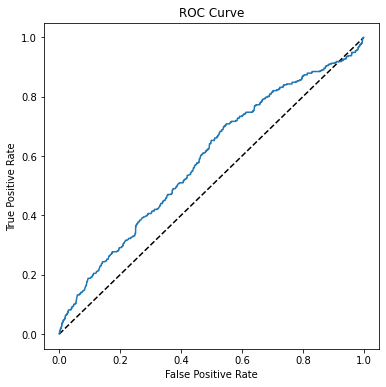

In [ ]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_s, y_scores_model1_s[:,1])


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_s, y_pred_model1_s))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5639
           1       0.00      0.00      0.00       357

    accuracy                           0.94      5996
   macro avg       0.47      0.50      0.48      5996
weighted avg       0.88      0.94      0.91      5996



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test_s, y_pred_model1_s)
print(mcm)

[[5639    0]
 [ 357    0]]


In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test_s,y_scores_model1_s[:,1])
print('AUC: ' + str(auc))

AUC: 0.5869383043162291


# This is not a good model as the AUC is 0.58 and accuracy is high. But the FP and FN is zero. The model fails to predict the right false positives. 

# Implementing Random Forest Classifier (Model2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train the model
model2_s = RandomForestClassifier().fit(X_train_s, y_train_s)
print (model2, "\n")
model2_s.score(X_test_s,y_test_s)

RandomForestClassifier() 



0.9359573048699132

In [ ]:
payment_prediction_model2_s = model2_s.predict(X_test_s)
print('Predicted labels: ', payment_prediction[:15])
print('Actual labels   : ' ,y_test_s[:15])

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual labels   :  ORDER_ID
47367    0
5406     0
30707    0
33297    0
603      1
36530    0
24664    0
24024    0
35080    0
48061    0
24117    0
48366    0
21685    0
23697    0
30600    0
Name: CLASS, dtype: int64


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_s, payment_prediction_model2_s))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5639
           1       0.21      0.03      0.05       357

    accuracy                           0.94      5996
   macro avg       0.58      0.51      0.51      5996
weighted avg       0.90      0.94      0.91      5996



In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test_s, payment_prediction_model2_s)
print(mcm)

[[5602   37]
 [ 347   10]]


In [ ]:
y_scores_model2_s = model2.predict_proba(X_test_s)
print(y_scores_model2_s)

[[0.77068182 0.22931818]
 [0.78615501 0.21384499]
 [0.8347132  0.1652868 ]
 ...
 [0.89068182 0.10931818]
 [0.6518254  0.3481746 ]
 [0.8347132  0.1652868 ]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


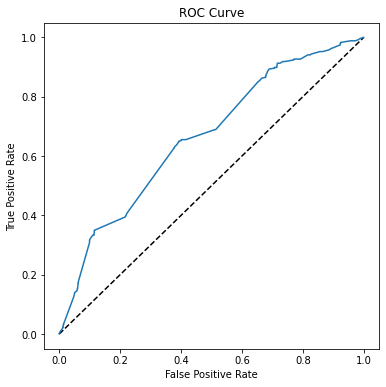

In [ ]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_s, y_scores_model2_s[:,1])


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test_s,y_scores_model2_s[:,1])
print('AUC: ' + str(auc))

AUC: 0.6637756361633145


# Changing the model to Logistic regression to compare the model performance

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Set regularization rate
reg = 0.01
from sklearn.metrics import accuracy_score

# train a logistic regression model on the training set
model3_s = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train_s, y_train_s)

predictions_model3_s = model3_s.predict(X_test_s)

print('Accuracy: ', accuracy_score(y_test_s, predictions_model3_s))

Accuracy:  0.9404603068712475


In [ ]:
from sklearn. metrics import classification_report

print(classification_report(y_test_s, predictions_model3_s))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5639
           1       0.50      0.01      0.02       357

    accuracy                           0.94      5996
   macro avg       0.72      0.50      0.49      5996
weighted avg       0.91      0.94      0.91      5996



In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test_s, predictions_model3_s))
print("Overall Recall:",recall_score(y_test_s, predictions_model3_s))

Overall Precision: 0.5
Overall Recall: 0.008403361344537815


In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test_s, predictions_model3_s)
print (cm)

[[5636    3]
 [ 354    3]]


In [ ]:
y_scores_model3_s = model3_s.predict_proba(X_test_s)
print(y_scores_model3_s)

[[0.98198798 0.01801202]
 [0.91188807 0.08811193]
 [0.94067244 0.05932756]
 ...
 [0.95937335 0.04062665]
 [0.73606409 0.26393591]
 [0.92216949 0.07783051]]


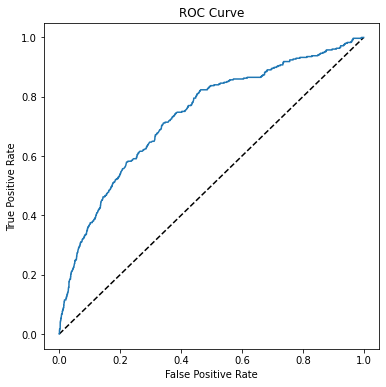

In [ ]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_s, y_scores_model3_s[:,1])


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test_s,y_scores_model3_s[:,1])
print('AUC: ' + str(auc))

AUC: 0.7345621703194489


# Comparing the performance of the models without scaling the input data (features)

<b> 1. Support Vector Machine </b>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import svm
model1 = svm.SVC(probability=True)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.9404603068712475

In [ ]:
y_pred_model1 = model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_model1)
print("Accuracy:", accuracy)

Accuracy: 0.9404603068712475


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
# calculate precision, recall, and F1 score
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred_model1)

# print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: [0.94046031 0.        ]
Recall: [1. 0.]
F1 Score: [0.96931672 0.        ]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_scores_model1 = model1.predict_proba(X_test)
print(y_scores_model1)

[[0.93957504 0.06042496]
 [0.93957707 0.06042293]
 [0.93957372 0.06042628]
 ...
 [0.93957466 0.06042534]
 [0.939576   0.060424  ]
 [0.93957632 0.06042368]]


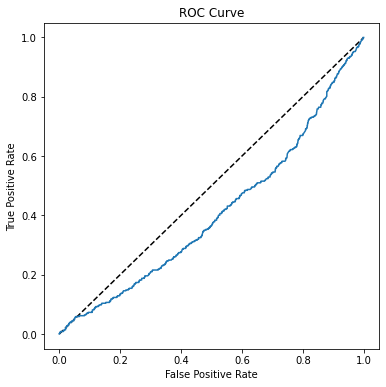

In [ ]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_model1[:,1])


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_model1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5639
           1       0.00      0.00      0.00       357

    accuracy                           0.94      5996
   macro avg       0.47      0.50      0.48      5996
weighted avg       0.88      0.94      0.91      5996



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, y_pred_model1)
print(mcm)

[[5639    0]
 [ 357    0]]


In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores_model1[:,1])
print('AUC: ' + str(auc))

AUC: 0.40972955949537115


<b> 2. RandomForestClassifier </b>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train the model
model2 = RandomForestClassifier().fit(X_train, y_train)
print (model2, "\n")
model2.score(X_test,y_test)

RandomForestClassifier() 



0.9352901934623082

In [ ]:
payment_prediction_model2 = model2.predict(X_test)
print('Predicted labels: ', payment_prediction_model2[:15])
print('Actual labels   : ' ,y_test[:15])

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual labels   :  ORDER_ID
47367    0
5406     0
30707    0
33297    0
603      1
36530    0
24664    0
24024    0
35080    0
48061    0
24117    0
48366    0
21685    0
23697    0
30600    0
Name: CLASS, dtype: int64


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, payment_prediction_model2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5639
           1       0.20      0.03      0.05       357

    accuracy                           0.94      5996
   macro avg       0.57      0.51      0.51      5996
weighted avg       0.90      0.94      0.91      5996



In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, payment_prediction_model2)
print(mcm)

[[5598   41]
 [ 347   10]]


In [ ]:
y_scores_model2 = model2.predict_proba(X_test)
print(y_scores_model2)

[[1.         0.        ]
 [0.91736957 0.08263043]
 [0.87959227 0.12040773]
 ...
 [0.96       0.04      ]
 [0.96416667 0.03583333]
 [1.         0.        ]]


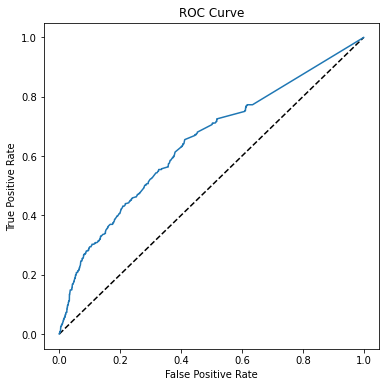

In [ ]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_model2[:,1])


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores_model2[:,1])
print('AUC: ' + str(auc))

AUC: 0.6463224055360751


<b> 3. Logistic Regression </b>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Set regularization rate
reg = 0.01
from sklearn.metrics import accuracy_score

# train a logistic regression model on the training set
model3 = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

predictions_model3 = model3.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions_model3))

Accuracy:  0.9404603068712475


In [ ]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions_model3))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5639
           1       0.50      0.01      0.02       357

    accuracy                           0.94      5996
   macro avg       0.72      0.50      0.49      5996
weighted avg       0.91      0.94      0.91      5996



In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions_model3))
print("Overall Recall:",recall_score(y_test, predictions_model3))

Overall Precision: 0.5
Overall Recall: 0.008403361344537815


In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions_model3)
print (cm)

[[5636    3]
 [ 354    3]]


In [ ]:
y_scores_model3 = model3.predict_proba(X_test)
print(y_scores_model3)

[[0.98191563 0.01808437]
 [0.91183433 0.08816567]
 [0.94071648 0.05928352]
 ...
 [0.95919674 0.04080326]
 [0.73728569 0.26271431]
 [0.92197197 0.07802803]]


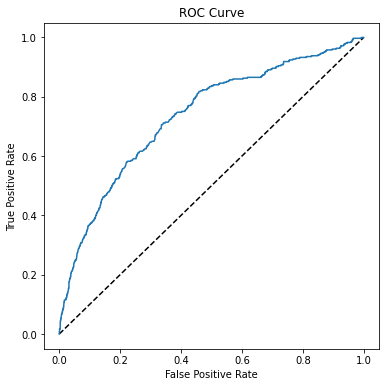

In [ ]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_model3[:,1])


# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores_model3[:,1])
print('AUC: ' + str(auc))

AUC: 0.7345750855759932


#### The results are better with scaling and Logistic Regression Model. We will use the <b>Logistic Regression Scaled Model to generate our output</b>.

## <b><font color=”blue”> Loading the test dataset and applying Model 3 to it to generate labels for the same. </font> </b>

In [ ]:
df_test = pd.read_csv("https://raw.githubusercontent.com/Sofiaanjum/AIGC5005_MidtermProject/main/risk-test.txt", delimiter="\t", index_col = 'ORDER_ID')
df_test.head()

,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,TIME_ORDER,AMOUNT_ORDER,ANUMMER_01,ANUMMER_02,ANUMMER_03,ANUMMER_04,ANUMMER_05,ANUMMER_06,ANUMMER_07,ANUMMER_08,ANUMMER_09,ANUMMER_10,CHK_LADR,CHK_RADR,CHK_KTO,CHK_CARD,CHK_COOKIE,CHK_IP,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
ORDER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49916,yes,no,7/22/1979,no,no,credit_card,Visa,2.2005,yes,64.5,Saturday,6:42,1,608801,?,?,?,?,?,?,?,?,?,no,no,no,no,no,no,no,no,no,no,no,no,6,yes,0,0.00,?,?,?
49918,no,no,2/5/1973,no,no,credit_card,Eurocard,4.2005,yes,74.3,Saturday,14:44,4,400124,103776,206310,207317,?,?,?,?,?,?,no,no,no,no,no,no,no,no,no,no,no,no,9,no,1,30.31,9/2/2004,0,0
49920,yes,no,7/19/1970,yes,no,check,?,8.2005,?,42.8,Sunday,18:40,1,406284,?,?,?,?,?,?,?,?,?,no,no,no,no,no,no,no,no,no,yes,no,no,5,yes,0,0.00,?,?,?
49921,yes,no,4/9/1985,yes,no,credit_card,Eurocard,7.2006,yes,42.8,Saturday,14:22,1,403772,?,?,?,?,?,?,?,?,?,no,no,no,no,no,no,no,no,no,no,no,no,13,no,1,54.07,12/24/2003,0,1
49922,no,yes,4/7/1963,no,no,debit_note,?,5.2007,yes,6.5,Wednesday,1:54,1,202410,?,?,?,?,?,?,?,?,?,no,no,no,no,no,no,no,no,no,yes,no,no,8,yes,0,0.00,?,?,?


In [ ]:
df_test.shape

(20000, 42)

In [ ]:
df_test = df_test.replace(to_replace="?", value=np.nan)

In [ ]:
df_test.head()

,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,TIME_ORDER,AMOUNT_ORDER,ANUMMER_01,ANUMMER_02,ANUMMER_03,ANUMMER_04,ANUMMER_05,ANUMMER_06,ANUMMER_07,ANUMMER_08,ANUMMER_09,ANUMMER_10,CHK_LADR,CHK_RADR,CHK_KTO,CHK_CARD,CHK_COOKIE,CHK_IP,FAIL_LPLZ,FAIL_LORT,FAIL_LPLZORTMATCH,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
ORDER_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49916,yes,no,7/22/1979,no,no,credit_card,Visa,2.2005,yes,64.5,Saturday,6:42,1,608801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,no,no,no,no,no,no,6,yes,0,0.00,NaN,NaN,NaN
49918,no,no,2/5/1973,no,no,credit_card,Eurocard,4.2005,yes,74.3,Saturday,14:44,4,400124,103776,206310,207317,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,no,no,no,no,no,no,9,no,1,30.31,9/2/2004,0,0
49920,yes,no,7/19/1970,yes,no,check,NaN,8.2005,NaN,42.8,Sunday,18:40,1,406284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,no,no,no,yes,no,no,5,yes,0,0.00,NaN,NaN,NaN
49921,yes,no,4/9/1985,yes,no,credit_card,Eurocard,7.2006,yes,42.8,Saturday,14:22,1,403772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,no,no,no,no,no,no,13,no,1,54.07,12/24/2003,0,1
49922,no,yes,4/7/1963,no,no,debit_note,NaN,5.2007,yes,6.5,Wednesday,1:54,1,202410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,no,no,no,no,no,no,yes,no,no,8,yes,0,0.00,NaN,NaN,NaN


In [ ]:
df_test.isnull().sum()

B_EMAIL                  0
B_TELEFON                0
B_BIRTHDATE           2054
FLAG_LRIDENTISCH         0
FLAG_NEWSLETTER          0
Z_METHODE                0
Z_CARD_ART           12317
Z_CARD_VALID             0
Z_LAST_NAME           9706
VALUE_ORDER              0
WEEKDAY_ORDER            0
TIME_ORDER              15
AMOUNT_ORDER             0
ANUMMER_01               0
ANUMMER_02           14905
ANUMMER_03           17907
ANUMMER_04           19123
ANUMMER_05           19636
ANUMMER_06           19855
ANUMMER_07           19935
ANUMMER_08           19971
ANUMMER_09           19982
ANUMMER_10           19987
CHK_LADR                 0
CHK_RADR                 0
CHK_KTO                  0
CHK_CARD                 0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_LORT                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZ                0
FAIL_RORT                0
FAIL_RPLZORTMATCH        0
SESSION_TIME             0
NEUKUNDE                 0
A

In [ ]:
df_test.drop(columns=['ANUMMER_01', 'ANUMMER_02','ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05', 'ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09', 'ANUMMER_10'], inplace=True)

In [ ]:
df_test.drop(columns=['DATE_LORDER'], inplace=True)

In [ ]:
df_test['Z_CARD_ART'] = df_test['Z_CARD_ART'].replace(to_replace=np.nan, value='unknown')

In [ ]:
impute_label(df_test, 'B_EMAIL')
impute_label(df_test, 'B_TELEFON')
impute_label(df_test, 'FLAG_LRIDENTISCH')
impute_label(df_test, 'FLAG_NEWSLETTER')
impute_label(df_test, 'CHK_LADR')
impute_label(df_test, 'CHK_RADR')
impute_label(df_test, 'CHK_KTO')
impute_label(df_test, 'CHK_CARD')
impute_label(df_test, 'CHK_COOKIE')
impute_label(df_test, 'CHK_IP')
impute_label(df_test, 'FAIL_LPLZ')
impute_label(df_test, 'FAIL_LORT')
impute_label(df_test, 'FAIL_LPLZORTMATCH')
impute_label(df_test, 'FAIL_RPLZ')
impute_label(df_test, 'FAIL_RORT')
impute_label(df_test, 'FAIL_RPLZORTMATCH')
impute_label(df_test, 'NEUKUNDE')

In [ ]:
df_test.isnull().sum()

B_EMAIL                  0
B_TELEFON                0
B_BIRTHDATE           2054
FLAG_LRIDENTISCH         0
FLAG_NEWSLETTER          0
Z_METHODE                0
Z_CARD_ART               0
Z_CARD_VALID             0
Z_LAST_NAME           9706
VALUE_ORDER              0
WEEKDAY_ORDER            0
TIME_ORDER              15
AMOUNT_ORDER             0
CHK_LADR                 0
CHK_RADR                 0
CHK_KTO                  0
CHK_CARD                 0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_LORT                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZ                0
FAIL_RORT                0
FAIL_RPLZORTMATCH        0
SESSION_TIME             0
NEUKUNDE                 0
AMOUNT_ORDER_PRE         0
VALUE_ORDER_PRE          0
MAHN_AKT             10579
MAHN_HOECHST         10579
dtype: int64

In [ ]:
# Split the 'Name' column on the space delimiter
df_test[['V_MONTH', 'V_YEAR']] = df_test['Z_CARD_VALID'].astype(str).str.split('.', expand=True)

# Drop the original 'Name' column
df_test = df_test.drop('Z_CARD_VALID', axis=1)

df_test['V_MONTH'] = df_test['V_MONTH'].astype(int)
df_test['V_YEAR'] = df_test['V_YEAR'].astype(int)

In [ ]:
df_test['MAHN_AKT'] = df_test['MAHN_AKT'].replace(np.nan, value=9) 
df_test['MAHN_HOECHST'] = df_test['MAHN_HOECHST'].replace(np.nan, value=9)
df_test['Z_LAST_NAME'] = df_test['Z_LAST_NAME'].replace(np.nan, value='unknown')
df_test.drop(columns=['B_BIRTHDATE'], inplace=True)
df_cleaned_test = df_test.dropna()

In [ ]:
df_cleaned_test.isnull().sum()

B_EMAIL              0
B_TELEFON            0
FLAG_LRIDENTISCH     0
FLAG_NEWSLETTER      0
Z_METHODE            0
Z_CARD_ART           0
Z_LAST_NAME          0
VALUE_ORDER          0
WEEKDAY_ORDER        0
TIME_ORDER           0
AMOUNT_ORDER         0
CHK_LADR             0
CHK_RADR             0
CHK_KTO              0
CHK_CARD             0
CHK_COOKIE           0
CHK_IP               0
FAIL_LPLZ            0
FAIL_LORT            0
FAIL_LPLZORTMATCH    0
FAIL_RPLZ            0
FAIL_RORT            0
FAIL_RPLZORTMATCH    0
SESSION_TIME         0
NEUKUNDE             0
AMOUNT_ORDER_PRE     0
VALUE_ORDER_PRE      0
MAHN_AKT             0
MAHN_HOECHST         0
V_MONTH              0
V_YEAR               0
dtype: int64

In [ ]:
# Split the 'Name' column on the space delimiter
df_cleaned_test[['ORDER_HOUR', 'ORDER_MINUTE']] = df_cleaned_test['TIME_ORDER'].str.split(':', expand=True)

# Drop the original 'Name' column
df_cleaned_test = df_cleaned_test.drop('TIME_ORDER', axis=1)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_cleaned_test['Z_METHODE'] = df_cleaned_test['Z_METHODE'].map({'check':1 ,'credit_card':2, 'debit_note':3, 'debit_card':4})

In [ ]:
df_cleaned_test['Z_LAST_NAME'] = df_cleaned_test['Z_LAST_NAME'].map({'yes':1 ,'no':0, 'unknown':9})

In [ ]:
df_cleaned_test['Z_CARD_ART'] = df_cleaned_test['Z_CARD_ART'].map({'Eurocard':1 ,'Visa':2, 'debit_card':3, 'Amex':4, 'unknown':9})

In [ ]:
df_cleaned_test['WEEKDAY_ORDER'] = df_cleaned_test['WEEKDAY_ORDER'].map({'Sunday':1 ,'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday':6, 'Saturday':7})

In [ ]:
df_cleaned_test['MAHN_AKT'] = df_cleaned_test['MAHN_AKT'].astype(int)
df_cleaned_test['MAHN_HOECHST'] = df_cleaned_test['MAHN_HOECHST'].astype(int)
df_cleaned_test['ORDER_HOUR'] = df_cleaned_test['ORDER_HOUR'].astype(int)
df_cleaned_test['ORDER_MINUTE'] = df_cleaned_test['ORDER_MINUTE'].astype(int)

In [ ]:
df_final_test = df_cleaned_test.drop(columns = ['FLAG_LRIDENTISCH','VALUE_ORDER','AMOUNT_ORDER','CHK_KTO','CHK_CARD','FAIL_LPLZ','FAIL_LPLZORTMATCH','FAIL_RPLZ','FAIL_RPLZORTMATCH','V_MONTH','V_YEAR', 'ORDER_HOUR','ORDER_MINUTE'])

In [ ]:
df_final_test.head()

,B_EMAIL,B_TELEFON,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,WEEKDAY_ORDER,CHK_LADR,CHK_RADR,CHK_COOKIE,CHK_IP,FAIL_LORT,FAIL_RORT,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,PREDICTIONS
ORDER_ID,,,,,,,,,,,,,,,,,,,,
49916,1,0,0,2,2,1,7,0,0,0,0,0,0,6,1,0,0.00,9,9,0
49918,0,0,0,2,1,1,7,0,0,0,0,0,0,9,0,1,30.31,0,0,0
49920,1,0,0,1,9,9,1,0,0,0,0,0,0,5,1,0,0.00,9,9,0
49921,1,0,0,2,1,1,7,0,0,0,0,0,0,13,0,1,54.07,0,1,0
49922,0,1,0,3,9,1,4,0,0,0,0,0,0,8,1,0,0.00,9,9,0


In [ ]:
df_pred_final = df_final_test.copy()

In [ ]:
df_pred_final['PREDICTIONS_ns'] = model3.predict(df_final_test)

In [ ]:
df_pred_final['PREDICTIONS'] = model3_s.predict(df_final_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
df_pred_final.head()

,B_EMAIL,B_TELEFON,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,WEEKDAY_ORDER,CHK_LADR,CHK_RADR,CHK_COOKIE,CHK_IP,FAIL_LORT,FAIL_RORT,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,PREDICTIONS,PREDICTIONS_ns
ORDER_ID,,,,,,,,,,,,,,,,,,,,,
49916,1,0,0,2,2,1,7,0,0,0,0,0,0,6,1,0,0.00,9,9,1,0
49918,0,0,0,2,1,1,7,0,0,0,0,0,0,9,0,1,30.31,0,0,0,0
49920,1,0,0,1,9,9,1,0,0,0,0,0,0,5,1,0,0.00,9,9,0,0
49921,1,0,0,2,1,1,7,0,0,0,0,0,0,13,0,1,54.07,0,1,0,0
49922,0,1,0,3,9,1,4,0,0,0,0,0,0,8,1,0,0.00,9,9,1,0


##<b> 4. Apply the Best Model to test data. </b>

####<b> The Scaled Version of Logistic Regression performs better than any other model we implemented. We will use the output "PREDICTIONS" generated using the scaled model as our final target column.

In [ ]:
df_pred_final.PREDICTIONS.value_counts()

0    13355
1     6630
Name: PREDICTIONS, dtype: int64

In [ ]:
df_pred_final.PREDICTIONS_ns.value_counts()

0    19971
1       14
Name: PREDICTIONS_ns, dtype: int64

In [ ]:
df_pred_final.head()

,B_EMAIL,B_TELEFON,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,WEEKDAY_ORDER,CHK_LADR,CHK_RADR,CHK_COOKIE,CHK_IP,FAIL_LORT,FAIL_RORT,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,PREDICTIONS,PREDICTIONS_ns
ORDER_ID,,,,,,,,,,,,,,,,,,,,,
49916,1,0,0,2,2,1,7,0,0,0,0,0,0,6,1,0,0.00,9,9,1,0
49918,0,0,0,2,1,1,7,0,0,0,0,0,0,9,0,1,30.31,0,0,0,0
49920,1,0,0,1,9,9,1,0,0,0,0,0,0,5,1,0,0.00,9,9,0,0
49921,1,0,0,2,1,1,7,0,0,0,0,0,0,13,0,1,54.07,0,1,0,0
49922,0,1,0,3,9,1,4,0,0,0,0,0,0,8,1,0,0.00,9,9,1,0


In [ ]:
df_predictions = df_pred_final.reset_index()

In [ ]:
df_predictions = df_predictions[['ORDER_ID', 'PREDICTIONS']]
df_predictions.head()

,ORDER_ID,PREDICTIONS
0,49916,1
1,49918,0
2,49920,0
3,49921,0
4,49922,1


In [ ]:
df_predictions['PREDICTIONS'] = df_predictions['PREDICTIONS'].map({1:'yes' ,0:'no'})

In [ ]:
df_predictions.head()

,ORDER_ID,PREDICTIONS
0,49916,yes
1,49918,no
2,49920,no
3,49921,no
4,49922,yes


In [ ]:
df_predictions.to_csv('Enter_File_Location/output.txt', index=False, sep='\t')